Recently, a credit card company named ABC encounter challenges in which many of customers have stopped using their
services. Data scientists being asked to create a predictive model to predict which customers will churn so the company
can provide early additional services for those customers in the hope that customers will change their minds and do not
stop using the company ABC credit card services.

Given dataset : ‘churn_train’ and ‘churn_test’ which you can find in dataset ZIP file >> folder ‘Python & ML’.
Notes : CLIENTNUM is unique customer number and Churn_Flag is the target

Question
Please create a machine learning model using python to predict whether customer is churn (1) or not (0),
Following criteria below:

- Data pre-processing [Handling missing data or outliers or imbalanced class or others.] ( 3 marks ).
- Training classification ML using at least 1 algorithm [Logistic Regression or Decision Tree, etc.] ( 3 marks ).
- Evaluate model performance using confusion matrix and explain the model precision and recall ( 2 marks ).
- Please create prediction csv using from ‘churn_test’ data( 2 marks ).

# Data Loading

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use("fivethirtyeight")
import seaborn as sns
import sklearn
sklearn.__version__
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.compose import make_column_transformer,ColumnTransformer
import joblib
from sklearn import tree
import imblearn 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
train = pd.read_csv('/Users/zaintama/Documents/Hacktiv8/AGIT Technical Test/Dataset/Python & ML/Churn_train.csv')
test = pd.read_csv('/Users/zaintama/Documents/Hacktiv8/AGIT Technical Test/Dataset/Python & ML/Churn_test.csv')

In [3]:
train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag
0,772382283,46,F,3,Graduate,Married,Less than $40K,Blue,36,3,3,3,2302.0,1593,709.0,0.671,2689,49,0.324,0.692,1
1,709206333,44,F,4,Graduate,Single,$40K - $60K,Blue,30,3,4,4,4333.0,0,4333.0,0.463,1558,40,0.538,0.000,1
2,714887808,43,F,1,Uneducated,Single,Less than $40K,Blue,36,1,3,2,1818.0,0,1818.0,0.758,2279,50,0.724,0.000,1
3,709531908,53,M,3,High School,Married,$60K - $80K,Blue,47,5,2,2,1438.3,0,1438.3,0.776,2184,53,0.828,0.000,0
4,739692933,46,F,2,Unknown,Single,$40K - $60K,Blue,29,4,2,4,3126.0,2517,609.0,1.235,1638,41,0.519,0.805,0


In [4]:
test.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,716470683,48,F,3,Post-Graduate,Married,Unknown,Blue,36,3,1,3,20631.0,2048,18583.0,0.676,4827,77,0.711,0.099
1,720328983,52,F,5,Unknown,Married,Less than $40K,Blue,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000
2,716390958,45,M,4,Unknown,Married,$120K +,Blue,31,1,4,3,26107.0,0,26107.0,0.550,1697,47,0.424,0.000
3,708741633,52,M,4,High School,Married,$60K - $80K,Blue,44,6,3,4,4153.0,0,4153.0,0.434,1771,41,0.367,0.000
4,715492983,40,M,3,Post-Graduate,Married,$120K +,Blue,36,4,2,4,7464.0,2517,4947.0,0.900,4348,62,0.879,0.337


In [5]:
train.isnull().sum()

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Churn_Flag                  0
dtype: int64

There isn't any null / NA data

# EDA

**Checking categorical variable**

In [6]:
category = [var for var in train.columns if train[var].dtypes=='O']

print('There are {} categorical variables \n'.format(len(category)))
print('The categorical variables are: ', category)

There are 5 categorical variables 

The categorical variables are:  ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


**Checking numerical variable**

In [7]:
num_cols = list(train.select_dtypes("number").columns)
print("Num Features Length",len(num_cols), ":", num_cols)

Num Features Length 16 : ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Churn_Flag']


## Numerical Features

**Checking distribution of numerical data**

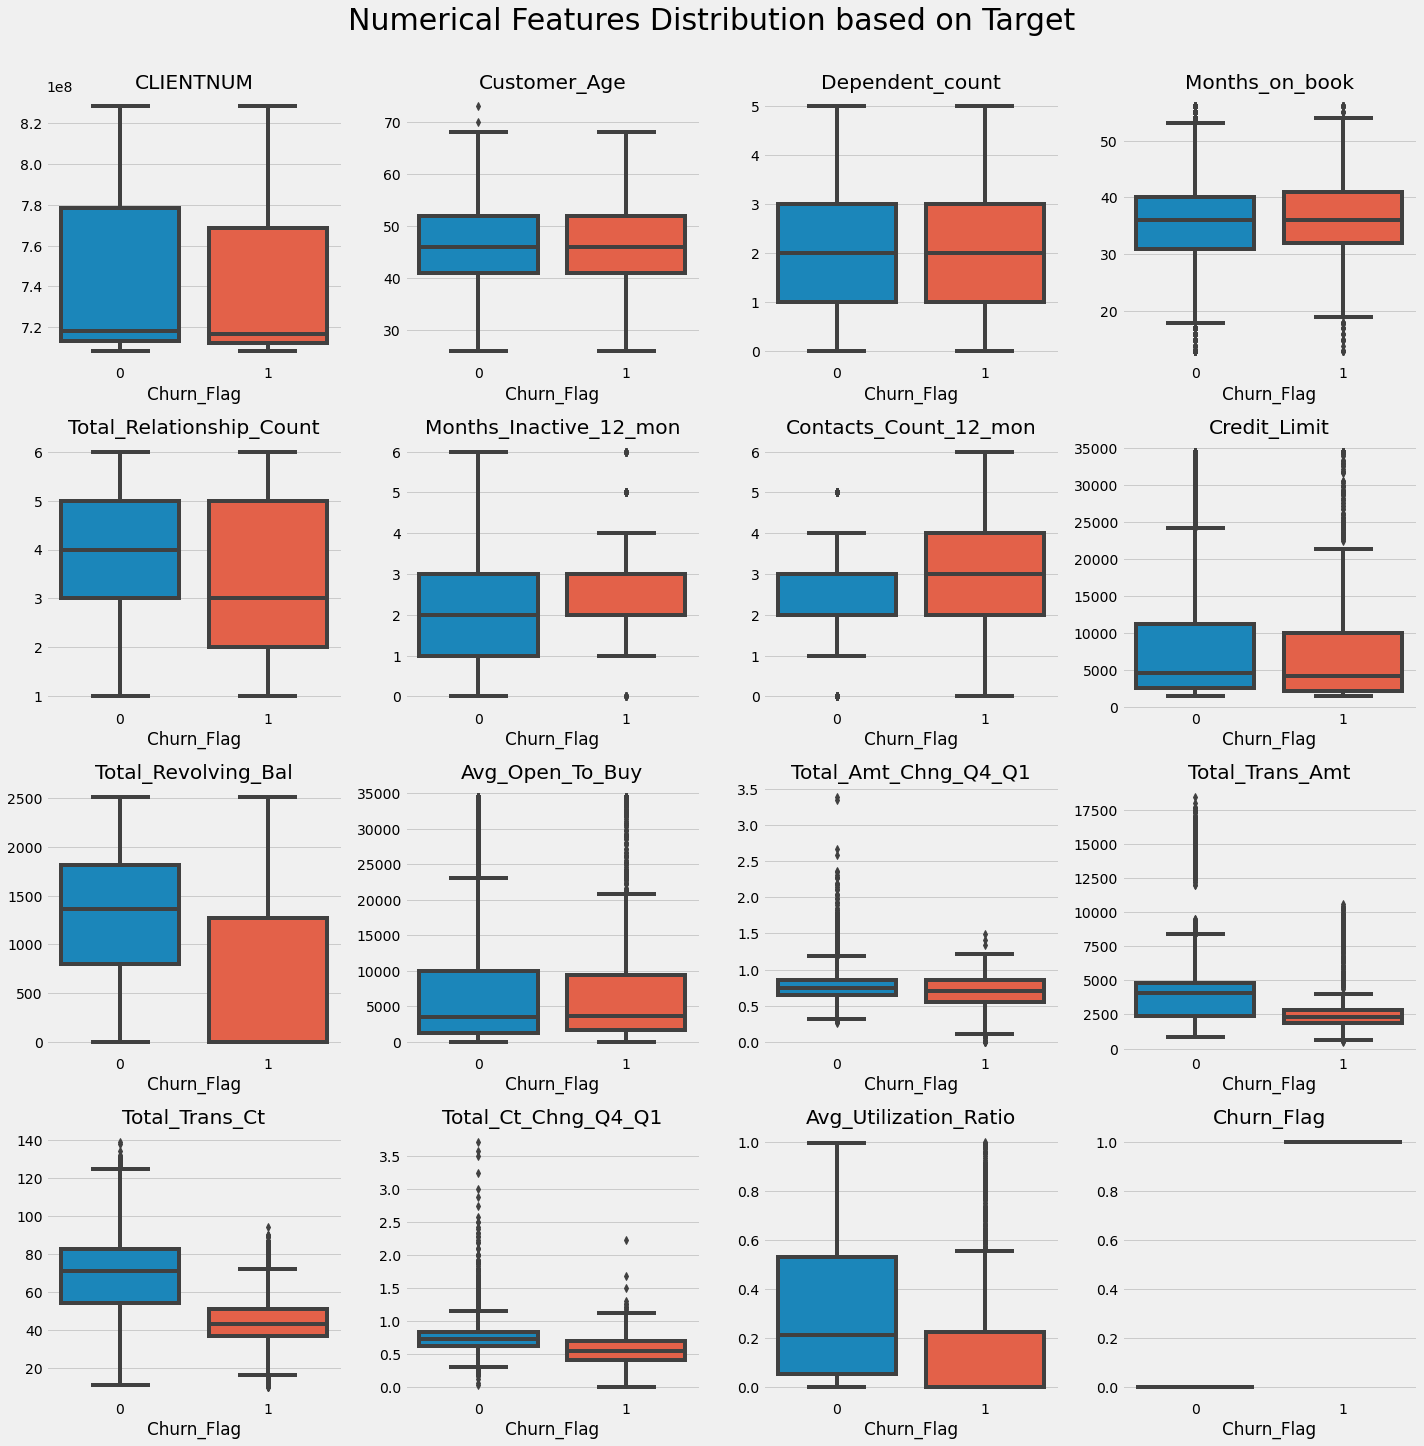

In [8]:
plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//4, 4, i+1)
    ax = sns.boxplot(
        y = train[num_cols[i]],
        x = train['Churn_Flag'],
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

From the graph below, the variables the contain outliers are:
- Customer_Age 
- Months_on_Book
- Months_Inactive_12_mon 
- **Credit Limit**
- **Avg_Open_To_Buy** 
- **Total_Amt_Chng_Q4_Q1**
- **Total_Trans_Amt**
- **Total_Trans_Ct**
- **Total_Ct_Chng_Q4_Q1**
- **Avg_Utilization_Ratio**

The variables that are bold are the variables that contain many outliers, these have to be handled

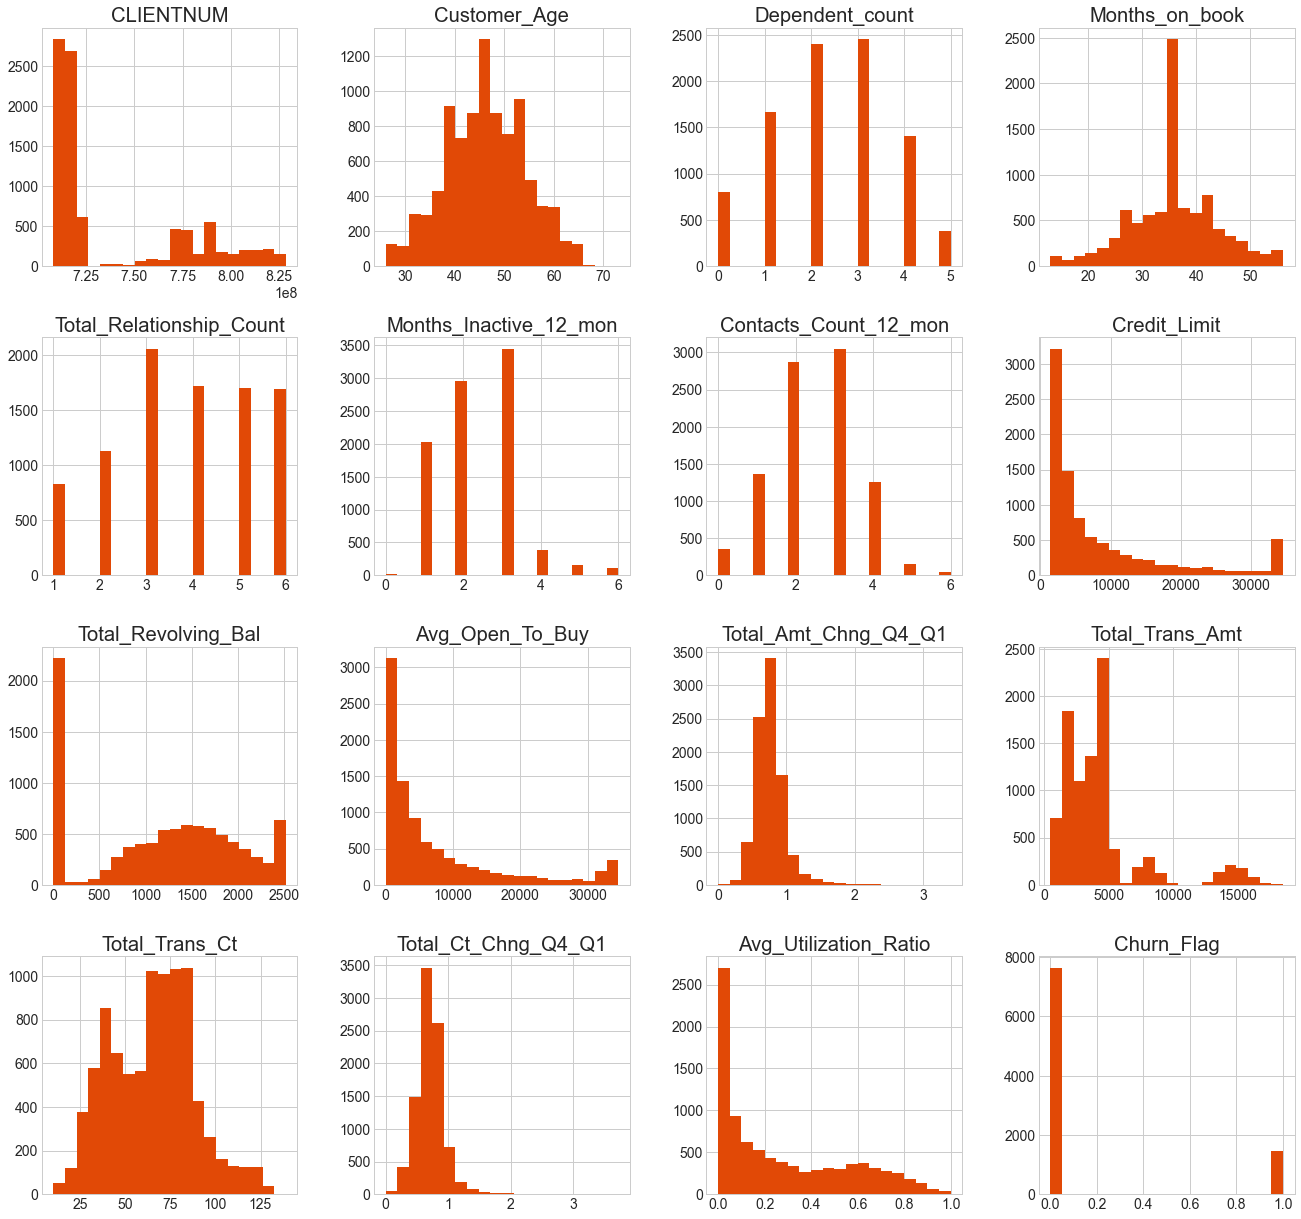

In [9]:
plt.style.use('seaborn-whitegrid')

train.hist(bins=20, figsize=(20,20), color='#E14906')
plt.show()

#### Customer_Age

In [10]:
print('Max age: ', train['Customer_Age'].max())
print('Min age: ', train['Customer_Age'].min())
print('Median age: ', train['Customer_Age'].median())

Max age:  73
Min age:  26
Median age:  46.0


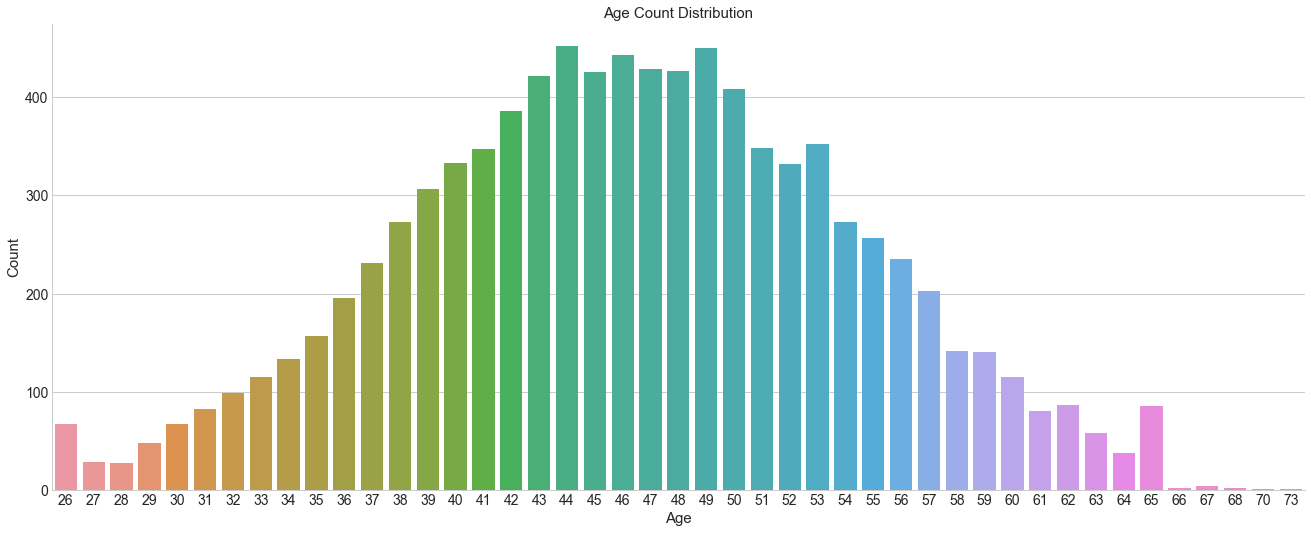

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'Customer_Age', data = train)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


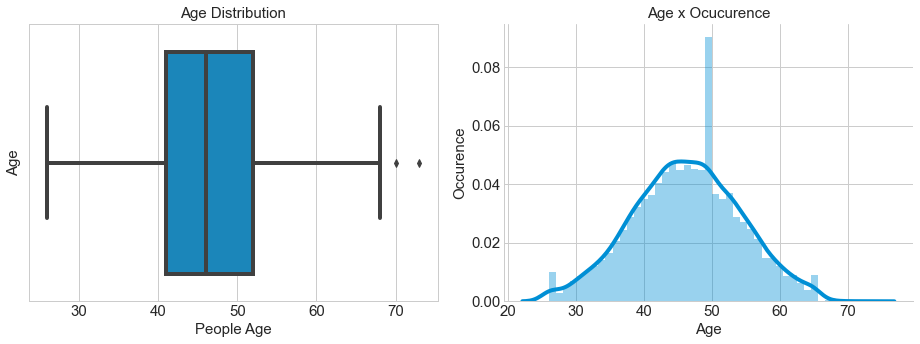

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Customer_Age', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train['Customer_Age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [13]:
# Quartiles
print('1º Quartile: ', train['Customer_Age'].quantile(q = 0.25))
print('2º Quartile: ', train['Customer_Age'].quantile(q = 0.50))
print('3º Quartile: ', train['Customer_Age'].quantile(q = 0.75))
print('4º Quartile: ', train['Customer_Age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', train['Customer_Age'].quantile(q = 0.75) + 
                      1.5*(train['Customer_Age'].quantile(q = 0.75) - train['Customer_Age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  41.0
2º Quartile:  46.0
3º Quartile:  52.0
4º Quartile:  73.0
Ages above:  68.5 are outliers


### Months on Book

In [14]:
print('Max age: ', train['Months_on_book'].max())
print('Min age: ', train['Months_on_book'].min())
print('Median age: ', train['Months_on_book'].median())

Max age:  56
Min age:  13
Median age:  36.0


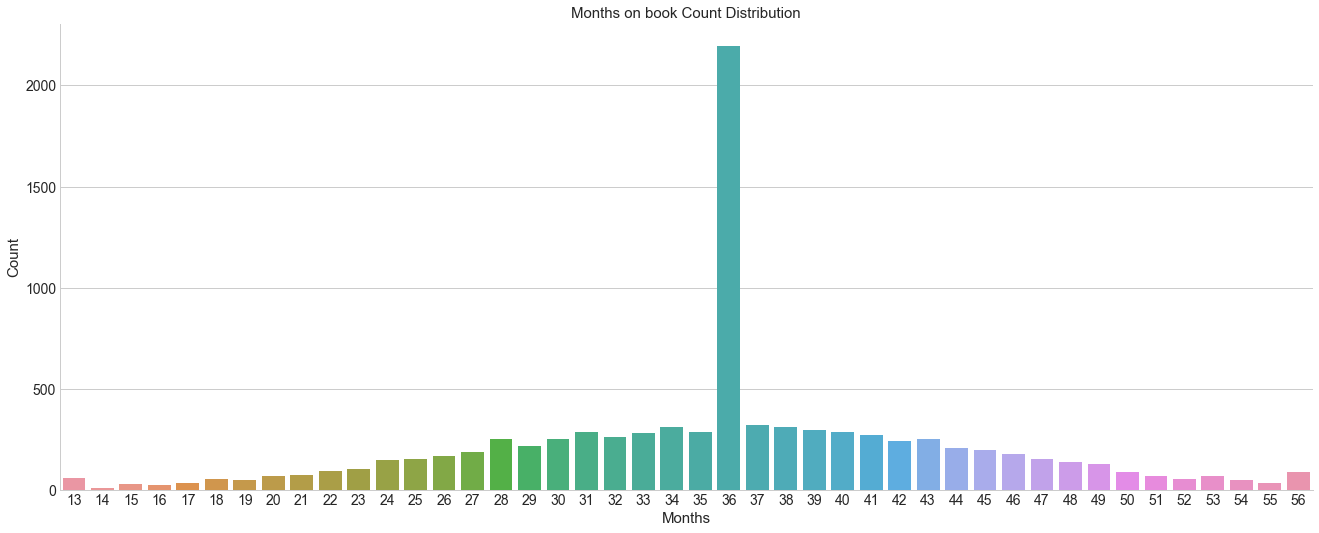

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'Months_on_book', data = train)
ax.set_xlabel('Months', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Months on book Count Distribution', fontsize=15)
sns.despine()

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


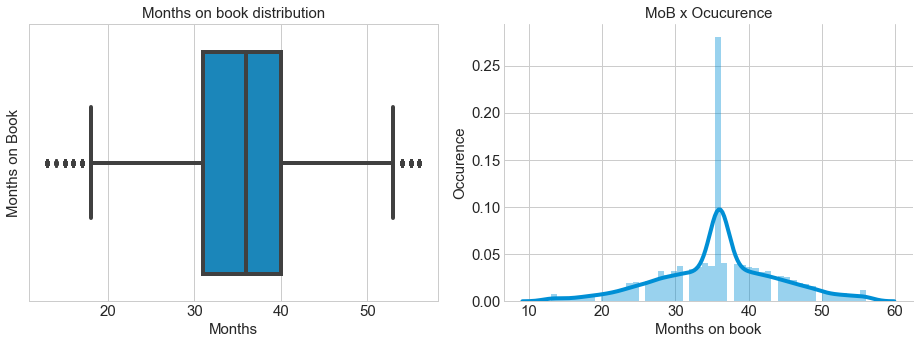

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Months_on_book', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('Months', fontsize=15)
ax1.set_ylabel('Months on Book', fontsize=15)
ax1.set_title('Months on book distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train['Months_on_book'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Months on book', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('MoB x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [17]:
# Quartiles
print('1º Quartile: ', train['Months_on_book'].quantile(q = 0.25))
print('2º Quartile: ', train['Months_on_book'].quantile(q = 0.50))
print('3º Quartile: ', train['Months_on_book'].quantile(q = 0.75))
print('4º Quartile: ', train['Months_on_book'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Months above: ', train['Months_on_book'].quantile(q = 0.75) + 
                      1.5*(train['Months_on_book'].quantile(q = 0.75) - train['Months_on_book'].quantile(q = 0.25)), 'are outliers')
print('Months below: ', train['Months_on_book'].quantile(q = 0.75) + 
                      1.5*(train['Months_on_book'].quantile(q = 0.75) - train['Months_on_book'].quantile(q = 0.25)), 'are outliers')                      

1º Quartile:  31.0
2º Quartile:  36.0
3º Quartile:  40.0
4º Quartile:  56.0
Months above:  53.5 are outliers
Months below:  53.5 are outliers


# Data Preprocessing

## Splitting Data

In [18]:
train_new = pd.read_csv('/Users/zaintama/Documents/Hacktiv8/AGIT Technical Test/Dataset/Python & ML/Churn_train.csv')

In [19]:
train_new.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag
0,772382283,46,F,3,Graduate,Married,Less than $40K,Blue,36,3,3,3,2302.0,1593,709.0,0.671,2689,49,0.324,0.692,1
1,709206333,44,F,4,Graduate,Single,$40K - $60K,Blue,30,3,4,4,4333.0,0,4333.0,0.463,1558,40,0.538,0.000,1
2,714887808,43,F,1,Uneducated,Single,Less than $40K,Blue,36,1,3,2,1818.0,0,1818.0,0.758,2279,50,0.724,0.000,1
3,709531908,53,M,3,High School,Married,$60K - $80K,Blue,47,5,2,2,1438.3,0,1438.3,0.776,2184,53,0.828,0.000,0
4,739692933,46,F,2,Unknown,Single,$40K - $60K,Blue,29,4,2,4,3126.0,2517,609.0,1.235,1638,41,0.519,0.805,0


In [20]:
X = train_new.drop('Churn_Flag',axis=1)
y= train_new['Churn_Flag']

In [21]:
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,772382283,46,F,3,Graduate,Married,Less than $40K,Blue,36,3,3,3,2302.0,1593,709.0,0.671,2689,49,0.324,0.692
1,709206333,44,F,4,Graduate,Single,$40K - $60K,Blue,30,3,4,4,4333.0,0,4333.0,0.463,1558,40,0.538,0.000
2,714887808,43,F,1,Uneducated,Single,Less than $40K,Blue,36,1,3,2,1818.0,0,1818.0,0.758,2279,50,0.724,0.000
3,709531908,53,M,3,High School,Married,$60K - $80K,Blue,47,5,2,2,1438.3,0,1438.3,0.776,2184,53,0.828,0.000
4,739692933,46,F,2,Unknown,Single,$40K - $60K,Blue,29,4,2,4,3126.0,2517,609.0,1.235,1638,41,0.519,0.805


In [22]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Churn_Flag, dtype: int64

In [23]:
X.drop('CLIENTNUM',inplace=True,axis=1)
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,46,F,3,Graduate,Married,Less than $40K,Blue,36,3,3,3,2302.0,1593,709.0,0.671,2689,49,0.324,0.692
1,44,F,4,Graduate,Single,$40K - $60K,Blue,30,3,4,4,4333.0,0,4333.0,0.463,1558,40,0.538,0.000
2,43,F,1,Uneducated,Single,Less than $40K,Blue,36,1,3,2,1818.0,0,1818.0,0.758,2279,50,0.724,0.000
3,53,M,3,High School,Married,$60K - $80K,Blue,47,5,2,2,1438.3,0,1438.3,0.776,2184,53,0.828,0.000
4,46,F,2,Unknown,Single,$40K - $60K,Blue,29,4,2,4,3126.0,2517,609.0,1.235,1638,41,0.519,0.805


In [24]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8)

In [25]:
print(train_new.shape)
print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)

(9114, 21)
(7291, 19)
(7291,)
(1823, 19)
(1823,)


(None, None)

## Pipeline

First we want to see the raw data without handling the outliers.

In [26]:
category

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [27]:
num_cols

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Churn_Flag']

In [28]:
num_cols.remove('CLIENTNUM')
num_cols

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Churn_Flag']

In [29]:
num_cols.remove('Churn_Flag')
num_cols

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [30]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, category)])

In [31]:
# set the tolerance to a large value to make the example faster
rf_selection = RandomForestClassifier(random_state = 42)
#categorical_transformer = OneHotEncoder(handle_unknown='ignore')
#numerical_transformer = StandardScaler()
pipe = Pipeline(steps=[
    ("preprocessing", preprocessor), 
    ("rf_selection", rf_selection)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
hyperparameters = {
    'rf_selection__max_depth': [10, 30],
    'rf_selection__min_samples_split': [2],
    'rf_selection__min_samples_leaf' : [10],
    'rf_selection__max_features' : ['auto'],
    'rf_selection__n_estimators': [50, 100]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1',
    'recall' :'recall'
}
search = GridSearchCV(pipe, hyperparameters, scoring=scoring, refit='auc', return_train_score=True)
rf_grid = search.fit(X_train, y_train)
#rf_grid = GridSearchCV(pipe, hyperparameters, scoring=scoring, refit='auc', return_train_score=True)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

Best parameter (CV score=0.981):
{'rf_selection__max_depth': 30, 'rf_selection__max_features': 'auto', 'rf_selection__min_samples_leaf': 10, 'rf_selection__min_samples_split': 2, 'rf_selection__n_estimators': 100}


In [32]:
rf_best_params=search.best_params_

In [33]:
rf_best_params

{'rf_selection__max_depth': 30,
 'rf_selection__max_features': 'auto',
 'rf_selection__min_samples_leaf': 10,
 'rf_selection__min_samples_split': 2,
 'rf_selection__n_estimators': 100}

In [34]:
#fungsi print_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_val)
        clf_report = pd.DataFrame(classification_report(y_val, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

In [35]:
rf_refit = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',RandomForestClassifier(max_depth=30,max_features='auto',min_samples_leaf=10,min_samples_split=2,n_estimators=50))])

In [36]:
rf_train = rf_refit.fit(X_train, y_train)
rf_pred = rf_refit.predict(X_val)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [37]:
print_score(rf_refit, X_train, y_train, X_val, y_val, train=True)
print_score(rf_refit, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 96.08%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.962375     0.950605  0.960774     0.956490      0.960470
recall        0.991982     0.799153  0.960774     0.895567      0.960774
f1-score      0.976954     0.868324  0.960774     0.922639      0.959373
support    6111.000000  1180.000000  0.960774  7291.000000   7291.000000
_______________________________________________
Confusion Matrix: 
 [[6062   49]
 [ 237  943]]

Test Result:
Accuracy Score: 93.47%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.939356    0.898551  0.934723     0.918954      0.932999
recall        0.986355    0.654930  0.934723     0.820642      0.934723
f1-score      0.962282    0.757637  0.934723     0.859960      0.930401
support    1539.000000  284.000000  

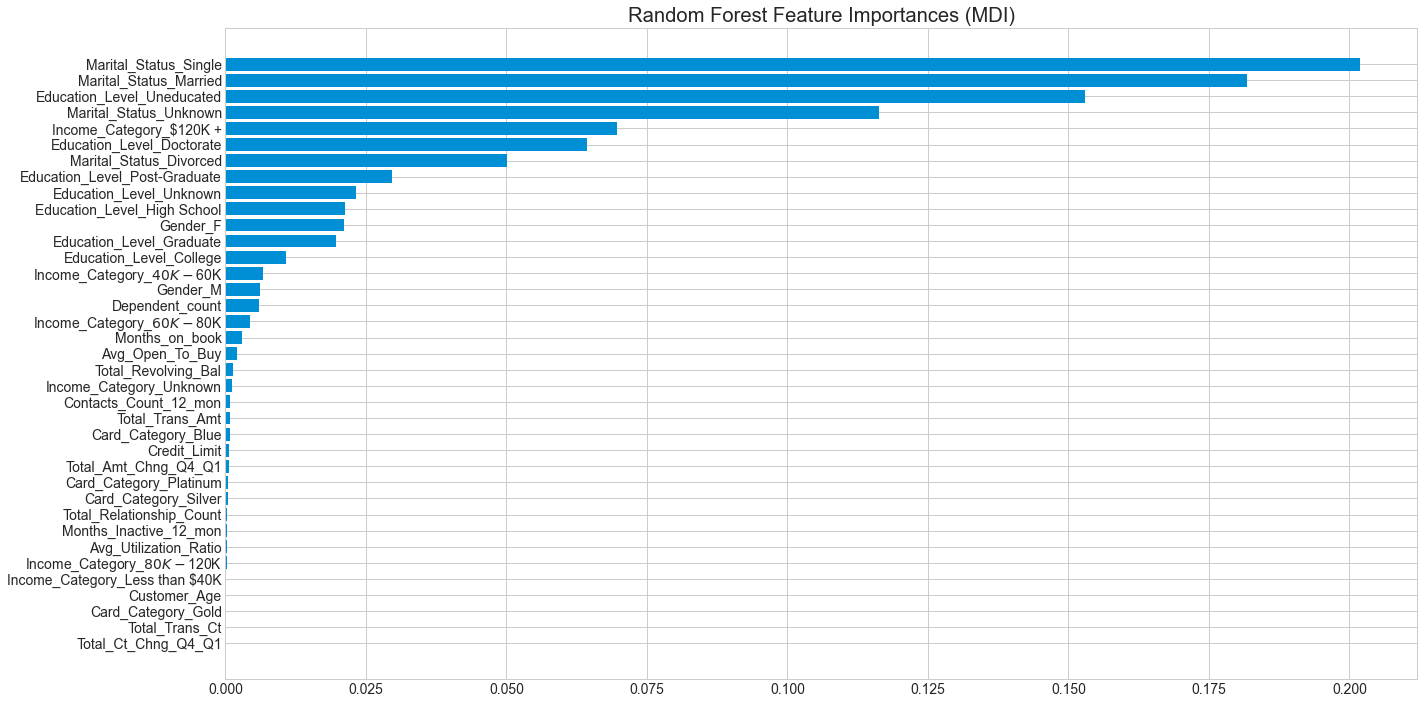

In [98]:
ohe = (rf_refit.named_steps['preprocessor']
         .named_transformers_['cat'])
feature_names = ohe.get_feature_names(input_features=category)
feature_names = np.r_[feature_names, num_cols]

tree_feature_importances = (
    rf_refit.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.savefig('Random Forest Features Importance.jpg')
plt.show()

In [39]:
import eli5
eli5.explain_weights(rf_refit.named_steps['classifier'], top=20, feature_names=feature_names)

Init Plugin
Init Graph Optimizer
Init Kernel


Weight,Feature
0.2019 ± 0.1978,Marital_Status_Single
0.1818 ± 0.1750,Marital_Status_Married
0.1530 ± 0.1913,Education_Level_Uneducated
0.1163 ± 0.1552,Marital_Status_Unknown
0.0698 ± 0.1311,Income_Category_$120K +
0.0643 ± 0.0760,Education_Level_Doctorate
0.0501 ± 0.0584,Marital_Status_Divorced
0.0296 ± 0.0536,Education_Level_Post-Graduate
0.0233 ± 0.0260,Education_Level_Unknown
0.0213 ± 0.0394,Education_Level_High School


## Model Improvement

From feature importances the top features are Marital status, Education, Gender, Income Category, Dependent Count, Avg_Open_To_Buy, and Months_on_book has most weight compare to other attributes

In [40]:
train_selected = train
train_selected.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag
0,772382283,46,F,3,Graduate,Married,Less than $40K,Blue,36,3,3,3,2302.0,1593,709.0,0.671,2689,49,0.324,0.692,1
1,709206333,44,F,4,Graduate,Single,$40K - $60K,Blue,30,3,4,4,4333.0,0,4333.0,0.463,1558,40,0.538,0.000,1
2,714887808,43,F,1,Uneducated,Single,Less than $40K,Blue,36,1,3,2,1818.0,0,1818.0,0.758,2279,50,0.724,0.000,1
3,709531908,53,M,3,High School,Married,$60K - $80K,Blue,47,5,2,2,1438.3,0,1438.3,0.776,2184,53,0.828,0.000,0
4,739692933,46,F,2,Unknown,Single,$40K - $60K,Blue,29,4,2,4,3126.0,2517,609.0,1.235,1638,41,0.519,0.805,0


In [41]:
train_selected = train_selected[['Marital_Status','Gender','Education_Level','Income_Category','Months_on_book','Dependent_count','Avg_Open_To_Buy','Churn_Flag']]
train_selected


,Marital_Status,Gender,Education_Level,Income_Category,Months_on_book,Dependent_count,Avg_Open_To_Buy,Churn_Flag
0,Married,F,Graduate,Less than $40K,36,3,709.0,1
1,Single,F,Graduate,$40K - $60K,30,4,4333.0,1
2,Single,F,Uneducated,Less than $40K,36,1,1818.0,1
3,Married,M,High School,$60K - $80K,47,3,1438.3,0
4,Single,F,Unknown,$40K - $60K,29,2,609.0,0
...,...,...,...,...,...,...,...,...
9109,Single,M,High School,$60K - $80K,26,3,23059.0,0
9110,Unknown,F,Graduate,Less than $40K,30,4,246.0,0
9111,Married,F,Graduate,Unknown,39,3,4389.0,0
9112,Married,F,Graduate,Unknown,31,4,5559.0,0


In [42]:
cat_new = [var for var in train_selected.columns if train[var].dtypes=='O']

print('There are {} categorical variables \n'.format(len(category)))
print('The categorical variables are: ', category)

There are 5 categorical variables 

The categorical variables are:  ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [43]:
num_new = list(train_selected.select_dtypes("number").columns)
print("Num Features Length",len(num_new), ":", num_new)

Num Features Length 4 : ['Months_on_book', 'Dependent_count', 'Avg_Open_To_Buy', 'Churn_Flag']


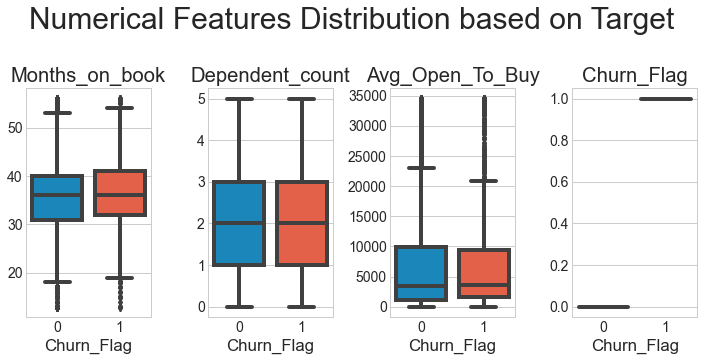

In [44]:
plt.figure(figsize=(10, 5))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 30, y = 1.005)
for i in range(len(num_new)):
    plt.subplot(len(num_new)//4, 4, i+1)
    ax = sns.boxplot(
        y = train_selected[num_new[i]],
        x = train_selected['Churn_Flag'],
    )
    ax.set_ylabel('')
    ax.set_title(num_new[i])
plt.tight_layout()
plt.show()

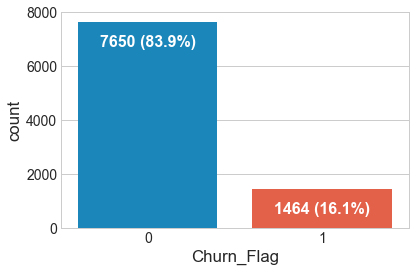

In [45]:
ax = sns.countplot(
    x= train_selected['Churn_Flag']
)
# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(train), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -25), 
        textcoords = 'offset points',
        color = 'white'
    )
plt.tight_layout()
plt.show()

There's outliers on 2 variables, there are Months_on_book and Avg_Open_To_Buy. Later we will handling this variables using SMOTE because the distribution of target is imbalanced.

In [46]:
num_new.remove('Churn_Flag')

In [47]:
numeric_transformer2 = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer2 = OneHotEncoder(handle_unknown='ignore')
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, num_new),
        ('cat', categorical_transformer2, cat_new)])

In [48]:
smote = SMOTE(sampling_strategy='not majority')

In [49]:
rf_refit_new = Pipeline(steps=[('preprocessor', preprocessor2),
                    ('sampling',smote),
                    ('classifier',RandomForestClassifier(max_depth=30,max_features='auto',min_samples_leaf=10,min_samples_split=2,n_estimators=50))])

In [50]:
rf_refit_new

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Months_on_book',
                                                   'Dependent_count',
                                                   'Avg_Open_To_Buy']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Marital_Status', 'Gender',
                                                   'Education_Level',
                                                   'Income_Category'])])),
                ('sampling', SMOTE(sampling_strategy='not majority')),
                ('classifier',
                 RandomForestClassifier(max_depth=30, max_features='auto',
                                        min_samples_leaf=10,
                                        n_estimators=50))])

In [51]:
X_selected = train_selected.drop('Churn_Flag',axis=1)
y_selected = train_selected['Churn_Flag']

In [52]:
X_train_selected, X_val_selected, y_train_selected, y_val_selected = train_test_split(X_selected, y_selected,train_size=0.8)

In [53]:
print(train_selected.shape)
print(X_train_selected.shape), print(y_train_selected.shape)
print(X_val_selected.shape), print(y_val_selected.shape)

(9114, 8)
(7291, 7)
(7291,)
(1823, 7)
(1823,)


(None, None)

In [54]:
rf_refit_new.fit(X_train_selected,y_train_selected)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Months_on_book',
                                                   'Dependent_count',
                                                   'Avg_Open_To_Buy']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Marital_Status', 'Gender',
                                                   'Education_Level',
                                                   'Income_Category'])])),
                ('sampling', SMOTE(sampling_strategy='not majority')),
                ('classifier',
                 RandomForestClassifier(max_depth=30, max_features='auto',
                                        min_samples_leaf=10,
                                        n_estimators=50))])

In [55]:
y_hat_test = rf_refit_new.predict(X_val_selected)

In [56]:
print_score(rf_refit_new, X_train_selected, y_train_selected, X_val_selected, y_val_selected, train=True)
print_score(rf_refit_new, X_train_selected, y_train_selected, X_val_selected, y_val_selected, train=False)

Train Result:
Accuracy Score: 81.92%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.904874     0.446402  0.819229     0.675638      0.831177
recall        0.876777     0.518771  0.819229     0.697774      0.819229
f1-score      0.890604     0.479874  0.819229     0.685239      0.824581
support    6119.000000  1172.000000  0.819229  7291.000000   7291.000000
_______________________________________________
Confusion Matrix: 
 [[5365  754]
 [ 564  608]]

Test Result:
Accuracy Score: 73.34%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.849498    0.204268  0.733406     0.526883      0.746148
recall        0.829523    0.229452  0.733406     0.529488      0.733406
f1-score      0.839392    0.216129  0.733406     0.527760      0.739560
support    1531.000000  292.000000  

## Other Model

XGBoost Classifier

We will train model with XGBoost Classifier without handling the imbalanced data. There's a parameter in XGB Classifier that suits imbalanced data, it is scale_post_weights. It will be included in hyperparameter tuning

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier

In [62]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [63]:
parameters = {'max_depth': range(2, 10), 'n_estimators': range(60, 220, 40), 'learning_rate': [0.1, 0.01, 0.05], 'scale_post_weight':[2,3,4,5]}

In [66]:
# set the tolerance to a large value to make the example faster
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
#categorical_transformer = OneHotEncoder(handle_unknown='ignore')
#numerical_transformer = StandardScaler()
pipe = Pipeline(steps=[
    ("preprocessing", preprocessor), 
    ("xgb", estimator)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
parameters = {
    'xgb__max_depth': [3,5,7,9], 
    'xgb__n_estimators': [10,20,30,40], 
    'xgb__learning_rate': [1,2,3], 
    'xgb__scale_post_weight':[2,3,4,5]}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1',
    'recall' :'recall'
}
xgb_grid = GridSearchCV(pipe, parameters, scoring=scoring, refit='auc', return_train_score=True)
xgb_grid_test = xgb_grid.fit(X_train, y_train)
#rf_grid = GridSearchCV(pipe, hyperparameters, scoring=scoring, refit='auc', return_train_score=True)
print("Best parameter (CV score=%0.3f):" % xgb_grid.best_score_)
print(xgb_grid.best_params_)

[09:27:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "scale_post_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:27:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "scale_post_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:27:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-

In [67]:
print_score(xgb_grid_test, X_train, y_train, X_val, y_val, train=True)
print_score(xgb_grid_test, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    6111.0  1180.0       1.0     7291.0        7291.0
_______________________________________________
Confusion Matrix: 
 [[6111    0]
 [   0 1180]]

Test Result:
Accuracy Score: 96.38%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.972418    0.912879  0.963796     0.942649      0.963143
recall        0.985055    0.848592  0.963796     0.916823      0.963796
f1-score      0.978696    0.879562  0.963796     0.929129      0.963252
support    1539.000000  284.000000  0.963796  1823.000000   1823.000000
_______________________

In [71]:
xgb_grid_test.best_params_

{'xgb__learning_rate': 1,
 'xgb__max_depth': 7,
 'xgb__n_estimators': 40,
 'xgb__scale_post_weight': 2}

In [73]:
xgb_refit = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',XGBClassifier(learning_rate= 1,max_depth= 7, n_estimators = 40,scale_post_weight= 2))])

In [74]:
xgb_refit.fit(X_train,y_train)

[09:39:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "scale_post_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Tra...
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=7, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=40, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

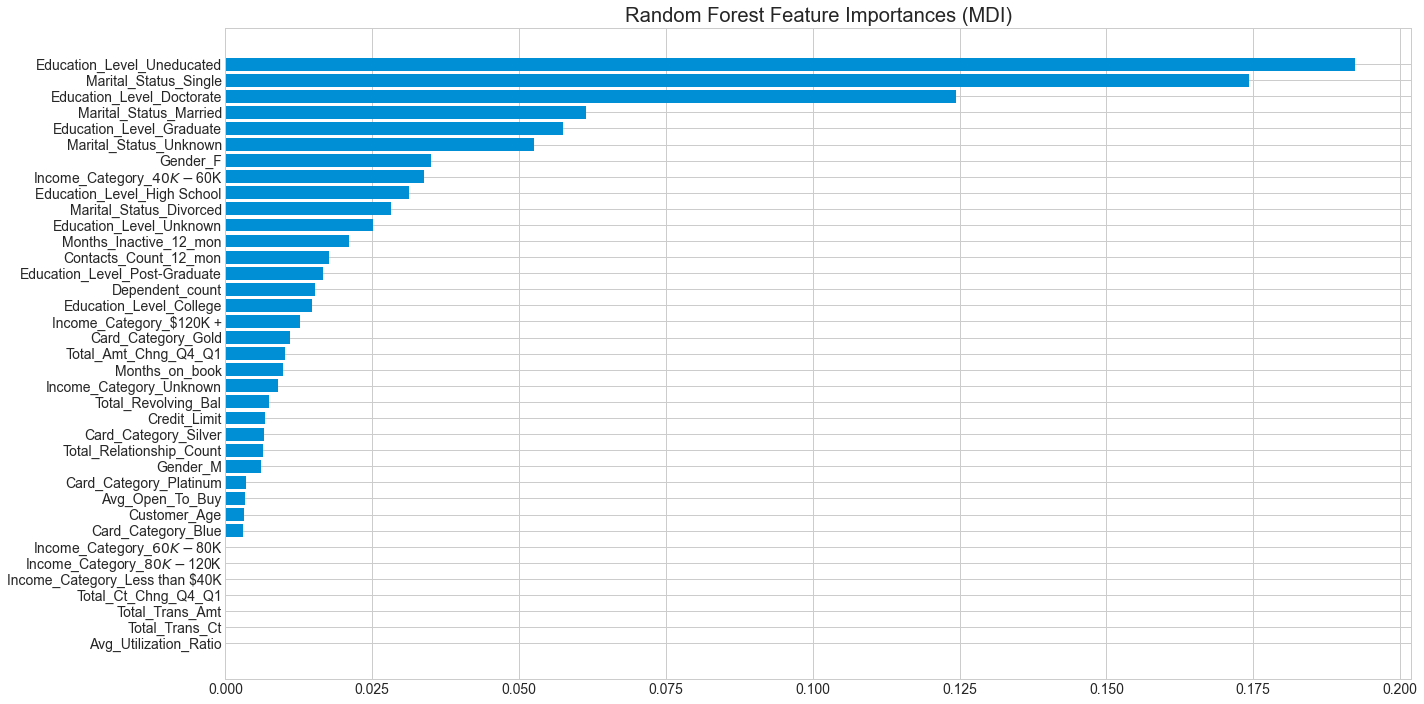

In [85]:
ohe = (xgb_refit.named_steps['preprocessor']
         .named_transformers_['cat'])
feature_names = ohe.get_feature_names(input_features=category)
feature_names = np.r_[feature_names, num_cols]

tree_feature_importances = (
    xgb_refit.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()
y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

## Model Testing

In [87]:
churn_predict = xgb_refit.predict(test)

In [88]:
churn_predict

array([0, 1, 1, ..., 1, 0, 0])

In [89]:
results = test
results['Churn_Predict'] = churn_predict.tolist()
results

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Predict
0,716470683,48,F,3,Post-Graduate,Married,Unknown,Blue,36,3,1,3,20631.0,2048,18583.0,0.676,4827,77,0.711,0.099,0
1,720328983,52,F,5,Unknown,Married,Less than $40K,Blue,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000,1
2,716390958,45,M,4,Unknown,Married,$120K +,Blue,31,1,4,3,26107.0,0,26107.0,0.550,1697,47,0.424,0.000,1
3,708741633,52,M,4,High School,Married,$60K - $80K,Blue,44,6,3,4,4153.0,0,4153.0,0.434,1771,41,0.367,0.000,1
4,715492983,40,M,3,Post-Graduate,Married,$120K +,Blue,36,4,2,4,7464.0,2517,4947.0,0.900,4348,62,0.879,0.337,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,711871758,30,F,1,Graduate,Married,Less than $40K,Blue,36,2,2,3,2905.0,2517,388.0,0.725,2487,39,0.393,0.866,1
1009,780206958,49,M,4,Graduate,Married,$60K - $80K,Blue,39,3,2,2,5937.0,2120,3817.0,0.654,4228,70,0.750,0.357,0
1010,712222758,38,F,3,Graduate,Married,Less than $40K,Blue,36,3,2,3,2300.0,0,2300.0,0.703,2500,47,0.119,0.000,1
1011,780653208,47,F,3,College,Married,Less than $40K,Blue,36,5,4,2,3300.0,2517,783.0,0.940,3784,55,1.115,0.763,0


**Saving predicted value to csv**

In [95]:
import os  
os.makedirs('results', exist_ok=True)  
results.to_csv('results/predicted.csv')  

## Model Evaluation

For churn predicting, the metrics that we will be analyze first is recall and then second is precision. 
- Precision : of all the users that the algorithm predicts will churn, how many of them do actually churn?
- Recall : What percentage of users that end up churning does the algorithm successfully find?

We will focusing on Recall value, because we want to anticipate the churn

1. Features Selection with Random Forest

Best parameter (CV score=0.981)

{'rf_selection__max_depth': 30, 'rf_selection__max_features': 'auto', 'rf_selection__min_samples_leaf': 10, 'rf_selection__min_samples_split': 2, 'rf_selection__n_estimators': 100}

<img src="/Users/zaintama/Documents/Hacktiv8/AGIT Technical Test/Random Forest Features Importance.jpg" alt="Getting started" />

From feature importances the top features are Marital status, Education, Gender, Income Category, Dependent Count, Avg_Open_To_Buy, and Months_on_book has most weight compare to other attributes

2. Random Forest with selected features, hyperparameter, and SMOTE

Hyperparameter
- max_depth: 30
- max_features: 'auto'
- min_samples_leaf: 10
- min_samples_split: 2
- n_estimators: 100

Train Result:
================================================
Accuracy Score: 81.92%
_______________________________________________
CLASSIFICATION REPORT:
|           | 0           | 1           | accuracy | macro avg   | weighted avg |
|-----------|-------------|-------------|----------|-------------|--------------|
| precision | 0.904874    | 0.446402    | 0.819229 | 0.675638    | 0.831177     |
| recall    | 0.876777    | 0.518771    | 0.819229 | 0.697774    | 0.819229     |
| f1 score  | 0.890604    | 0.479874    | 0.819229 | 0.685239    | 0.824581     |
| support   | 6119.000000 | 1172.000000 | 0.819229 | 7291.000000 | 7291.000000  |
_______________________________________________
Confusion Matrix: 
| [[5365 | 754]  |
|--------|-------|
| [ 564  | 608]] |

Test Result:
================================================
Accuracy Score: 73.34%
_______________________________________________
CLASSIFICATION REPORT:
|           | 0           | 1          | accuracy | macro avg   | weighted avg |
|-----------|-------------|------------|----------|-------------|--------------|
| precision | 0.849498    | 0.204268   | 0.733406 | 0.526883    | 0.746148     |
| recall    | 0.829523    | 0.229452   | 0.733406 | 0.529488    | 0.733406     |
| f1-score  | 0.839392    | 0.216129   | 0.733406 | 0.527760    | 0.739560     |
| support   | 1531.000000 | 292.000000 | 0.733406 | 1823.000000 | 1823.000000  |
_______________________________________________
Confusion Matrix: 
| [[1270 | 261] |
|--------|------|
| [ 225  | 67]] |



After using SMOTE, the precision and score for class 0 is pretty high, compare to class 1. Although the performance of model is decreasing in test result using the. 
Recall value for class 1 is to low

3. XGBoost Classifier without SMOTE

Best hyperparameter after grid search: {'xgb__learning_rate': 1, 'xgb__max_depth': 7, 'xgb__n_estimators': 40, 'xgb__scale_post_weight': 2}

Next we train XGBoost Classifier, this algorithm could be used for imbalanced data because it can tune the weight of each class

Train Result:
================================================
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
|           | 0      | 1      | accuracy | macro avg | weighted avg |
|-----------|--------|--------|----------|-----------|--------------|
| precision | 1.0    | 1.0    | 1.0      | 1.0       | 1.0          |
| recall    | 1.0    | 1.0    | 1.0      | 1.0       | 1.0          |
| f1-score  | 1.0    | 1.0    | 1.0      | 1.0       | 1.0          |
| support   | 6111.0 | 1180.0 | 1.0      | 7291.0    | 7291.0       |
_______________________________________________
Confusion Matrix: 
| [[6111 | 0]       |
|--------|----------|
| [      | 0 1180]] |

Test Result:
================================================
Accuracy Score: 96.38%
_______________________________________________
CLASSIFICATION REPORT:
|           | 0           | 1          | accuracy | macro avg   | weighted avg |
|-----------|-------------|------------|----------|-------------|--------------|
| precision | 0.972418    | 0.912879   | 0.963796 | 0.942649    | 0.963143     |
| recall    | 0.985055    | 0.848592   | 0.963796 | 0.916823    | 0.963796     |
| f1-score  | 0.978696    | 0.879562   | 0.963796 | 0.929129    | 0.963252     |
| support   | 1539.000000 | 284.000000 | 0.963796 | 1823.000000 | 1823.000000  |
_______________________________________________
Confusion Matrix: 
| [[1270 | 261] |
|--------|------|
| [ 225  | 67]] |


From the test classification report, this model likely to be overfitting because it has a perfect score. But from the validation result. The recall value for both class is good enough

# Conclusion

The model that suited this data is XGBoost Classifier with the hyperparameter:
- xgb__learning_rate: 1
- xgb__max_depth: 7
- xgb__n_estimators: 40
- xgb__scale_post_weight: 2

With score of 
- accuracy  : 96.38 % 
- recall in class 1 : 0.85
- Precision in class 0 : 0.97